In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data_path = '/content/drive/My Drive/Projects/Chocolate Features/chocolate.csv'

In [ ]:
data=pd.read_csv(data_path)

In [ ]:
data.head(2)

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN


In [ ]:
data.shape

(2224, 21)

In [ ]:
data.columns

Index(['Unnamed: 0', 'ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste'],
      dtype='object')

In [ ]:
# Removing unnecessary columns
data = data.drop(['ref', 'Unnamed: 0','company'], axis = 1) 

In [ ]:
data.shape

(2224, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_location                  2224 non-null   object 
 1   review_date                       2224 non-null   int64  
 2   country_of_bean_origin            2224 non-null   object 
 3   specific_bean_origin_or_bar_name  2224 non-null   object 
 4   cocoa_percent                     2224 non-null   float64
 5   rating                            2224 non-null   float64
 6   counts_of_ingredients             2224 non-null   int64  
 7   beans                             2224 non-null   object 
 8   cocoa_butter                      2224 non-null   object 
 9   vanilla                           2224 non-null   object 
 10  lecithin                          2224 non-null   object 
 11  salt                              2224 non-null   object 
 12  sugar 

In [ ]:
cat_features = ['company_location','review_date','country_of_bean_origin',
                'specific_bean_origin_or_bar_name','beans','cocoa_butter',
                'vanilla','lecithin','salt','sugar','sweetener_without_sugar',
                'first_taste','second_taste','third_taste','fourth_taste']

In [ ]:
# One-hot encoding
hot_chocolate = pd.get_dummies(data,columns=cat_features)

In [ ]:
hot_chocolate.shape

(2224, 2912)

In [ ]:
data_choc = pd.concat([data, hot_chocolate], axis=1)
data_choc.shape

(2224, 2930)

In [ ]:
# Dropping original columns
data_finale = data_choc.drop(columns=cat_features,axis = 1)

In [ ]:
data_finale.shape

(2224, 2915)

In [ ]:
# Checking if there are any duplicate columns
dups = data_finale.columns.duplicated()
for i in dups:
  if i==True:
    print(i)

True
True
True


In [ ]:
# Checking the duplicate column
dup_cols = data_finale.loc[:,data_finale.columns.duplicated()]
dup_cols.head(2)

,cocoa_percent,rating,counts_of_ingredients
0,76.0,3.75,3
1,76.0,3.50,3


In [ ]:
for col in data.columns:
  if col in dup_cols.columns:
    print(col)

cocoa_percent
rating
counts_of_ingredients


In [ ]:
# Removing duplicate columns
a = data_finale.loc[:,~data_finale.columns.duplicated()]

In [ ]:
a.shape

(2224, 2912)

In [ ]:
# Checking how many columns each category column is one-hot encoded into
for cat in cat_features:
  count=0
  for cols in data_finale.columns:
    if cat in cols:
      count=count+1
  print(cat,count)

company_location 66
review_date 15
country_of_bean_origin 62
specific_bean_origin_or_bar_name 1398
beans 2
cocoa_butter 2
vanilla 15
lecithin 2
salt 9
sugar 15
sweetener_without_sugar 2
first_taste 456
second_taste 479
third_taste 332
fourth_taste 88


In [ ]:
data_finale.fourth_taste_woody.value_counts()

0    2222
1       2
Name: fourth_taste_woody, dtype: int64

In [ ]:
b = a.drop('fourth_taste_woody', axis = 1)

In [ ]:
X = b.iloc[:,0:2800]
y = a.iloc[:,-1] 

In [ ]:
X.columns

Index(['cocoa_percent', 'rating', 'counts_of_ingredients',
       'company_location_Argentina', 'company_location_Australia',
       'company_location_Austria', 'company_location_Belgium',
       'company_location_Bolivia', 'company_location_Brazil',
       'company_location_Canada',
       ...
       'third_taste_synthetic', 'third_taste_tang', 'third_taste_tangerine',
       'third_taste_tangy', 'third_taste_tangy wine', 'third_taste_tannic',
       'third_taste_tart', 'third_taste_tart red berry', 'third_taste_tea',
       'third_taste_then off'],
      dtype='object', length=2800)

In [ ]:
X.shape

(2224, 2800)

In [ ]:
feature_names = X.iloc[:,0:2800].columns
feature_names

Index(['cocoa_percent', 'rating', 'counts_of_ingredients',
       'company_location_Argentina', 'company_location_Australia',
       'company_location_Austria', 'company_location_Belgium',
       'company_location_Bolivia', 'company_location_Brazil',
       'company_location_Canada',
       ...
       'third_taste_synthetic', 'third_taste_tang', 'third_taste_tangerine',
       'third_taste_tangy', 'third_taste_tangy wine', 'third_taste_tannic',
       'third_taste_tart', 'third_taste_tart red berry', 'third_taste_tea',
       'third_taste_then off'],
      dtype='object', length=2800)

In [ ]:
y.shape

(2224,)

# SelectFromModel

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

In [ ]:
#Fit the model
clf = LassoCV().fit(X, y)

In [ ]:
#Selected features
importance = np.abs(clf.coef_)

In [ ]:
print(importance)

[1.03255436e-18 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [ ]:
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01
idx_features = (-importance).argsort()[:10]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

Selected features: ['cocoa_percent' 'first_taste_pungent raisin' 'first_taste_pure'
 'first_taste_raisins' 'first_taste_raisiny' 'first_taste_raspberry'
 'first_taste_raw' 'first_taste_red berry' 'first_taste_red fruit'
 'first_taste_red wine']


# Feature ranking with recursive feature elimination

> > # With SVC and RFECV

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [ ]:
#Fit the model
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma='scale', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
#Selected features
print(X.columns[rfecv.get_support()])
print("Optimal number of features : %d" % rfecv.n_features_)

Index(['specific_bean_origin_or_bar_name_Malo Island, batch Ma20/19',
       'specific_bean_origin_or_bar_name_Venezuela, Trinidad',
       'second_taste_sweet'],
      dtype='object')
Optimal number of features : 3


In [ ]:
for i in range(X.shape[1]):
    print ('Column: %d, Selected %s, Rank: %.3f' % (i, rfecv.support_[i], rfecv.ranking_[i]))

Column: 0, Selected False, Rank: 130.000
Column: 1, Selected False, Rank: 24.000
Column: 2, Selected False, Rank: 30.000
Column: 3, Selected False, Rank: 138.000
Column: 4, Selected False, Rank: 137.000
Column: 5, Selected False, Rank: 136.000
Column: 6, Selected False, Rank: 135.000
Column: 7, Selected False, Rank: 134.000
Column: 8, Selected False, Rank: 147.000
Column: 9, Selected False, Rank: 59.000
Column: 10, Selected False, Rank: 145.000
Column: 11, Selected False, Rank: 146.000
Column: 12, Selected False, Rank: 155.000
Column: 13, Selected False, Rank: 159.000
Column: 14, Selected False, Rank: 162.000
Column: 15, Selected False, Rank: 163.000
Column: 16, Selected False, Rank: 166.000
Column: 17, Selected False, Rank: 168.000
Column: 18, Selected False, Rank: 170.000
Column: 19, Selected False, Rank: 172.000
Column: 20, Selected False, Rank: 73.000
Column: 21, Selected False, Rank: 173.000
Column: 22, Selected False, Rank: 171.000
Column: 23, Selected False, Rank: 169.000
Column

In [ ]:
print(X.columns[rfecv.get_support()]) 

Index(['specific_bean_origin_or_bar_name_Malo Island, batch Ma20/19',
       'specific_bean_origin_or_bar_name_Venezuela, Trinidad',
       'second_taste_sweet'],
      dtype='object')


Optimal number of features : 3


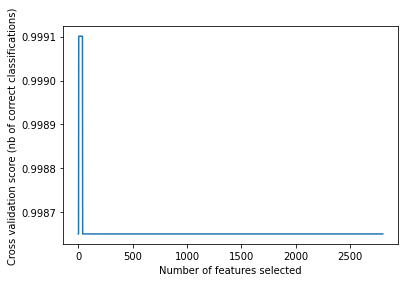

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

> > # With Logistic and RFE

In [ ]:
#Logistic Regression:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=5000)
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False False ... False False False]
Feature Ranking: [  24    6   23 ... 1033  554  623]


In [ ]:
for i in range(X.shape[1]):
    print ('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 24.000
Column: 1, Selected False, Rank: 6.000
Column: 2, Selected False, Rank: 23.000
Column: 3, Selected False, Rank: 1640.000
Column: 4, Selected False, Rank: 80.000
Column: 5, Selected False, Rank: 161.000
Column: 6, Selected False, Rank: 112.000
Column: 7, Selected False, Rank: 2061.000
Column: 8, Selected False, Rank: 128.000
Column: 9, Selected False, Rank: 38.000
Column: 10, Selected False, Rank: 833.000
Column: 11, Selected False, Rank: 83.000
Column: 12, Selected False, Rank: 288.000
Column: 13, Selected False, Rank: 515.000
Column: 14, Selected False, Rank: 109.000
Column: 15, Selected False, Rank: 240.000
Column: 16, Selected False, Rank: 68.000
Column: 17, Selected False, Rank: 635.000
Column: 18, Selected False, Rank: 338.000
Column: 19, Selected False, Rank: 1027.000
Column: 20, Selected False, Rank: 34.000
Column: 21, Selected False, Rank: 149.000
Column: 22, Selected False, Rank: 2643.000
Column: 23, Selected False, Rank: 668.000
Column:

In [ ]:
print(X.columns[rfe.get_support()]) 

Index(['specific_bean_origin_or_bar_name_Malo Island, batch Ma20/19',
       'specific_bean_origin_or_bar_name_Venezuela, Trinidad',
       'second_taste_sweet'],
      dtype='object')


# Filter based univariate selection (Select K Best)

In [ ]:
#import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

In [ ]:
#Fit the model
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concatenate the two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

AxesSubplot(0.125,0.125;0.775x0.755)


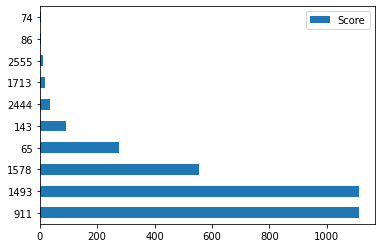

In [ ]:
#print 10 best features
print(featureScores.nlargest(10,'Score').plot(kind='barh'))
#plot graph of feature importances 
plt.show()

In [ ]:
#Name selected features
X.iloc[:,62].name,X.iloc[:,127].name,X.iloc[:,1578].name,X.iloc[:,1493].name,X.iloc[:,911].name

('company_location_U.S.A',
 'country_of_bean_origin_Sierra leone',
 'first_taste_basic',
 'specific_bean_origin_or_bar_name_Venezuela, Trinidad',
 'specific_bean_origin_or_bar_name_Malo Island, batch Ma20/19')

# Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
#Fit the model
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.03010474 0.015886   0.01243555 ... 0.         0.         0.        ]


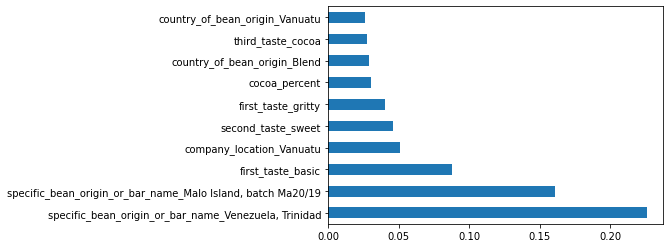

In [ ]:
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Voting Selector using Xuniverse

In [ ]:
!pip install xverse
from xverse.ensemble import VotingSelector
import matplotlib.pyplot as plt

In [ ]:
#Fit the model
clf = VotingSelector()
clf.fit(X, y)

Streaming output truncated to the last 5000 lines.
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-

VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=1400,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [ ]:
#Selected features
clf.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,first_taste_basic,3.849388e+00,0.056759,0.793520,0.081863,554.500450,0.0
1,company_location_Vanuatu,3.294181e+00,0.060856,0.753728,0.054168,276.252025,0.0
2,second_taste_sweet,2.827289e+00,0.054264,1.190692,0.060884,34.812985,0.0
3,country_of_bean_origin_Vanuatu,2.625398e+00,0.058440,0.743156,0.024299,90.759076,0.0
4,first_taste_gritty,1.767331e+00,0.057376,0.609678,0.042486,18.657932,0.0
...,...,...,...,...,...,...,...
2795,specific_bean_origin_or_bar_name_Bocas del Toro,2.025861e-07,0.000000,0.000000,0.000000,0.000900,0.0
2796,specific_bean_origin_or_bar_name_Blue Mountain...,2.025861e-07,0.000000,0.000000,0.000000,0.000900,0.0
2797,specific_bean_origin_or_bar_name_Blue Mountain,2.025861e-07,0.000000,0.000000,0.000000,0.000900,0.0
2798,specific_bean_origin_or_bar_name_Blend No. 1,2.025861e-07,0.000000,0.000000,0.000000,0.000900,0.0


AxesSubplot(0.125,0.125;0.775x0.755)


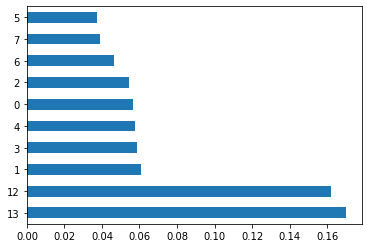

In [ ]:
print(clf.feature_importances_['Random_Forest'].nlargest(10).plot(kind='barh'))
plt.show()

In [ ]:
#Name selected features
print(
clf.feature_importances_['Variable_Name'][2],
clf.feature_importances_['Variable_Name'][1],
clf.feature_importances_['Variable_Name'][12],
clf.feature_importances_['Variable_Name'][13])

second_taste_sweet company_location_Vanuatu specific_bean_origin_or_bar_name_Malo Island, batch Ma20/19 specific_bean_origin_or_bar_name_Venezuela, Trinidad
